# 타이타닉 예제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
raw_data = pd.read_excel('titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [4]:
raw_data.describe() #숫자 데이터만 표현

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


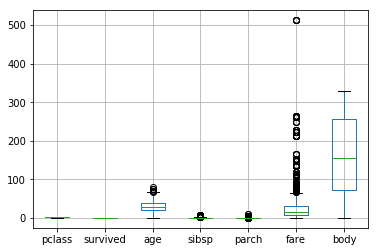

In [5]:
raw_data.boxplot()

0    809
1    500
Name: survived, dtype: int64


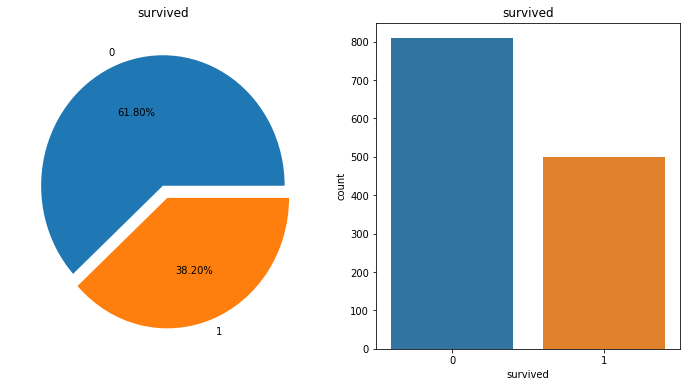

In [6]:
#생존률 그래프
f, ax = plt.subplots(1, 2, figsize=(12,6))

print( raw_data['survived'].value_counts())

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.2f%%", ax=ax[0])
ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('survived')

plt.show()

# 연령대 그래프

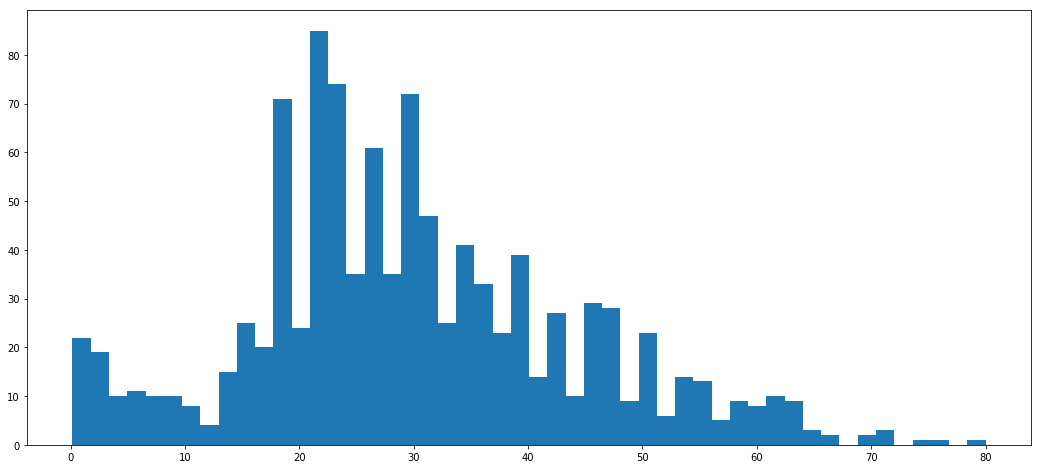

In [7]:
raw_data['age'].hist(bins=50, figsize=(18,8), grid=False) #bins는 가로 갯수, grid는 눈금선 나타냄

# 객실 등급별 통계

In [8]:
raw_data.groupby('pclass').mean() #groupby로 해서 평균

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


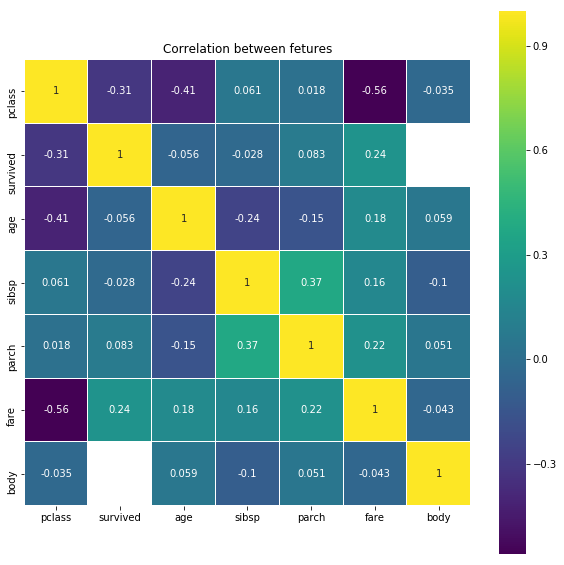

In [9]:
#상관계수 그래프
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True,
cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between fetures')
plt.show()

In [10]:
#나이 기준 통계 그래프
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0,10,20,50,100],
include_lowest=True, labels=['baby', 'teenage','adult','old'])

In [11]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",old
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old


C:\Users\Playdata\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


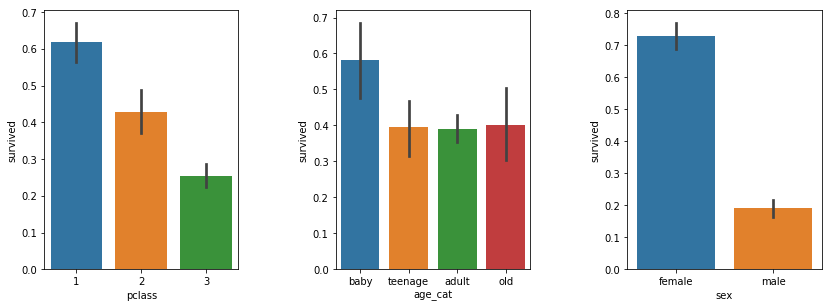

In [12]:
plt.figure(figsize = [12, 4])
plt.subplot(131) # 131 : row 방향 1개, column 방향 3개, 순서 1: 1 2 3
sns.barplot('pclass', 'survived', data =raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)

plt.subplot(133)
sns.barplot('sex', 'survived', data= raw_data)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\Playdata\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


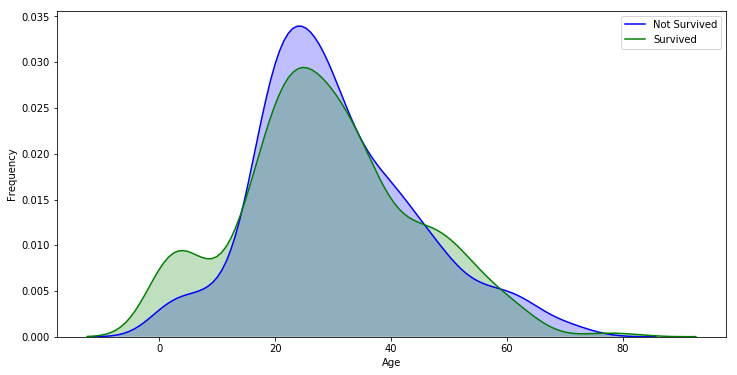

In [13]:
#나이 곡선 그래프
f, ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data['age'][(raw_data['survived'] == 0) &
(raw_data['age'].notnull())], ax=ax, color='Blue', shade=True)
g = sns.kdeplot(raw_data['age'][(raw_data['survived'] == 1) &
(raw_data['age'].notnull())], ax=g, color='Green', shade=True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

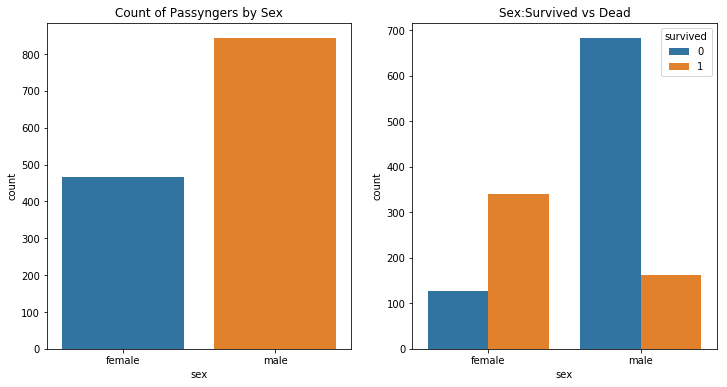

In [16]:
#남여 비교 그래프
f, ax = plt.subplots(1,2, figsize=(12, 6))
sns.countplot('sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passyngers by Sex')

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

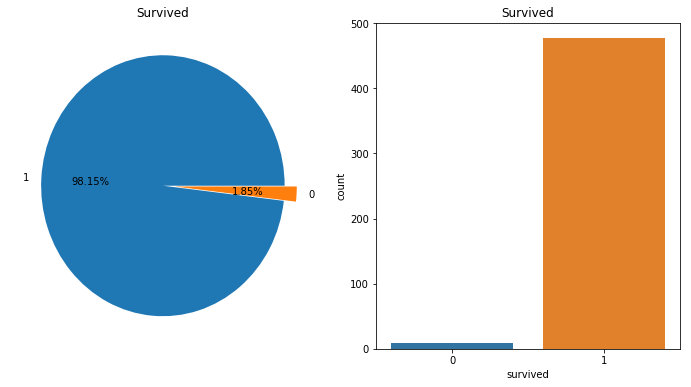

In [17]:
#보트 탑승 그래프
boat_survivors = raw_data[raw_data['boat'].notnull()]
f, ax = plt.subplots(1, 2, figsize=(12,6))
#print(boat_survivors['survived'].value_counts())
# 1   477
# 0     9

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [18]:
# 데이터 정제
tmp = []
for i in raw_data['sex']:
    if i == 'female':
        tmp.append(1)
    elif i == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)
        
raw_data['sex'] = tmp

In [19]:
raw_data['survived']=raw_data['survived'].astype('float')
raw_data['pclass']=raw_data['pclass'].astype('float')
raw_data['sex']=raw_data['sex'].astype('float')
raw_data['sibsp']=raw_data['sibsp'].astype('float')
raw_data['parch']=raw_data['parch'].astype('float')
raw_data['fare']=raw_data['fare'].astype('float')

In [20]:
raw_data = raw_data[raw_data['age'].notnull()]

In [21]:
raw_data = raw_data[raw_data['sibsp'].notnull()]

In [22]:
raw_data = raw_data[raw_data['parch'].notnull()]

In [23]:
raw_data = raw_data[raw_data['fare'].notnull()]

In [24]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [25]:
#데이터 선별
# 0:pclass, 3:sex, 4:age, 5:sibsp, 6:parch, 8:fare
x_data = raw_data.values[:, [0,3,4,5,6,8]]
x_data

array([[1.0, 1.0, 29.0, 0.0, 0.0, 211.3375],
       [1.0, 0.0, 0.9167, 1.0, 2.0, 151.55],
       [1.0, 1.0, 2.0, 1.0, 2.0, 151.55],
       ...,
       [3.0, 0.0, 26.5, 0.0, 0.0, 7.225],
       [3.0, 0.0, 27.0, 0.0, 0.0, 7.225],
       [3.0, 0.0, 29.0, 0.0, 0.0, 7.875]], dtype=object)

In [26]:
y_data = raw_data.values[:,[1]]
y_data

array([[1.0],
       [1.0],
       [0.0],
       ...,
       [0.0],
       [0.0],
       [0.0]], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

In [29]:
X_train.shape, X_test.shape, y_train.size, y_test.size

((940, 6), (105, 6), 940, 105)

In [30]:
import tensorflow as tf

In [31]:
import keras

Using TensorFlow backend.


In [32]:
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

In [33]:
tf.__version__

'1.11.0'

In [34]:
model = Sequential()

In [35]:
model.add(Dense(256, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))

In [36]:
model.compile(loss="mse", optimizer = "adam", metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs =500)

Train on 940 samples, validate on 105 samples
Epoch 1/500
940/940 [==============================] - 0s 284us/step - loss: 0.2665 - acc: 0.6117 - val_loss: 0.2002 - val_acc: 0.7524
Epoch 2/500
940/940 [==============================] - 0s 50us/step - loss: 0.2081 - acc: 0.6989 - val_loss: 0.1913 - val_acc: 0.7238
Epoch 3/500
940/940 [==============================] - 0s 53us/step - loss: 0.2008 - acc: 0.7117 - val_loss: 0.1976 - val_acc: 0.7524
Epoch 4/500
940/940 [==============================] - 0s 57us/step - loss: 0.1933 - acc: 0.7106 - val_loss: 0.1824 - val_acc: 0.7238
Epoch 5/500
940/940 [==============================] - 0s 51us/step - loss: 0.1796 - acc: 0.7468 - val_loss: 0.1719 - val_acc: 0.7905
Epoch 6/500
940/940 [==============================] - 0s 52us/step - loss: 0.1683 - acc: 0.7702 - val_loss: 0.1603 - val_acc: 0.8000
Epoch 7/500
940/940 [==============================] - 0s 54us/step - loss: 0.1698 - acc: 0.7553 - val_loss: 0.1635 - val_acc: 0.7905
Epoch 8/500
940

940/940 [==============================] - 0s 51us/step - loss: 0.1383 - acc: 0.8160 - val_loss: 0.1455 - val_acc: 0.8095
Epoch 122/500
940/940 [==============================] - 0s 62us/step - loss: 0.1324 - acc: 0.8202 - val_loss: 0.1421 - val_acc: 0.8381
Epoch 123/500
940/940 [==============================] - 0s 57us/step - loss: 0.1453 - acc: 0.7968 - val_loss: 0.1693 - val_acc: 0.7619
Epoch 124/500
940/940 [==============================] - 0s 48us/step - loss: 0.1513 - acc: 0.8021 - val_loss: 0.1549 - val_acc: 0.8190
Epoch 125/500
940/940 [==============================] - 0s 44us/step - loss: 0.1450 - acc: 0.8064 - val_loss: 0.1647 - val_acc: 0.7810
Epoch 126/500
940/940 [==============================] - 0s 44us/step - loss: 0.1396 - acc: 0.8074 - val_loss: 0.1478 - val_acc: 0.8095
Epoch 127/500
940/940 [==============================] - 0s 50us/step - loss: 0.1350 - acc: 0.8202 - val_loss: 0.1430 - val_acc: 0.8095
Epoch 128/500
940/940 [==============================] - 0s 50

940/940 [==============================] - 0s 50us/step - loss: 0.1308 - acc: 0.8170 - val_loss: 0.1666 - val_acc: 0.8190
Epoch 242/500
940/940 [==============================] - 0s 47us/step - loss: 0.1337 - acc: 0.8128 - val_loss: 0.1534 - val_acc: 0.8190
Epoch 243/500
940/940 [==============================] - 0s 54us/step - loss: 0.1317 - acc: 0.8170 - val_loss: 0.1702 - val_acc: 0.8000
Epoch 244/500
940/940 [==============================] - 0s 56us/step - loss: 0.1305 - acc: 0.8319 - val_loss: 0.1545 - val_acc: 0.7905
Epoch 245/500
940/940 [==============================] - 0s 46us/step - loss: 0.1280 - acc: 0.8181 - val_loss: 0.1517 - val_acc: 0.8286
Epoch 246/500
940/940 [==============================] - 0s 48us/step - loss: 0.1388 - acc: 0.8149 - val_loss: 0.1612 - val_acc: 0.7714
Epoch 247/500
940/940 [==============================] - 0s 46us/step - loss: 0.1455 - acc: 0.8117 - val_loss: 0.1451 - val_acc: 0.8476
Epoch 248/500
940/940 [==============================] - 0s 50

940/940 [==============================] - 0s 51us/step - loss: 0.1379 - acc: 0.8085 - val_loss: 0.1474 - val_acc: 0.8000
Epoch 362/500
940/940 [==============================] - 0s 48us/step - loss: 0.1314 - acc: 0.8213 - val_loss: 0.1504 - val_acc: 0.8190
Epoch 363/500
940/940 [==============================] - 0s 62us/step - loss: 0.1275 - acc: 0.8266 - val_loss: 0.1632 - val_acc: 0.8286
Epoch 364/500
940/940 [==============================] - 0s 52us/step - loss: 0.1268 - acc: 0.8298 - val_loss: 0.1787 - val_acc: 0.7905
Epoch 365/500
940/940 [==============================] - 0s 47us/step - loss: 0.1287 - acc: 0.8202 - val_loss: 0.1488 - val_acc: 0.8000
Epoch 366/500
940/940 [==============================] - 0s 46us/step - loss: 0.1254 - acc: 0.8362 - val_loss: 0.1541 - val_acc: 0.8381
Epoch 367/500
940/940 [==============================] - 0s 53us/step - loss: 0.1243 - acc: 0.8234 - val_loss: 0.1504 - val_acc: 0.8000
Epoch 368/500
940/940 [==============================] - 0s 46

940/940 [==============================] - 0s 47us/step - loss: 0.1248 - acc: 0.8245 - val_loss: 0.1692 - val_acc: 0.8000
Epoch 482/500
940/940 [==============================] - 0s 51us/step - loss: 0.1217 - acc: 0.8436 - val_loss: 0.1534 - val_acc: 0.7619
Epoch 483/500
940/940 [==============================] - 0s 57us/step - loss: 0.1211 - acc: 0.8372 - val_loss: 0.1638 - val_acc: 0.8190
Epoch 484/500
940/940 [==============================] - 0s 51us/step - loss: 0.1245 - acc: 0.8309 - val_loss: 0.1630 - val_acc: 0.7810
Epoch 485/500
940/940 [==============================] - 0s 54us/step - loss: 0.1347 - acc: 0.8128 - val_loss: 0.1617 - val_acc: 0.7524
Epoch 486/500
940/940 [==============================] - 0s 49us/step - loss: 0.1224 - acc: 0.8383 - val_loss: 0.1529 - val_acc: 0.8190
Epoch 487/500
940/940 [==============================] - 0s 53us/step - loss: 0.1233 - acc: 0.8340 - val_loss: 0.1678 - val_acc: 0.7333
Epoch 488/500
940/940 [==============================] - 0s 57

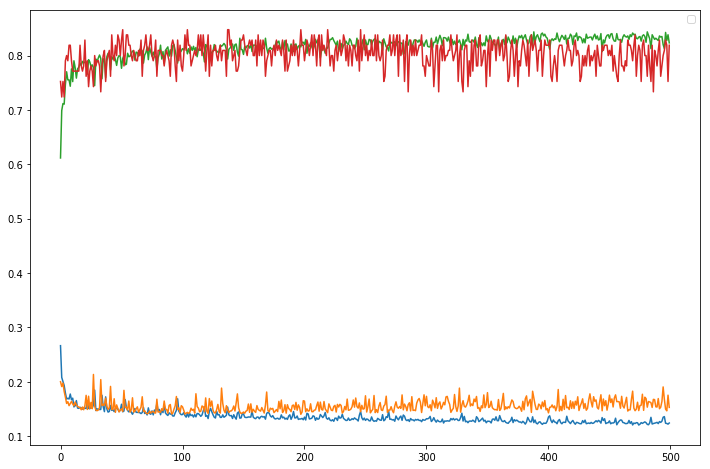

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend([])

In [42]:
# 디카프리오 살 수 있나?
# 3등실 탑승, 남성, 19살 형제 없고, 부모나 자녀 없음, 싼 표
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1, 6)
model.predict(dicaprio) # 생존 확률 17%

array([[0.16696441]], dtype=float32)

In [44]:
# 윈슬릿은 살 수 있나?
# 1등실, 여성, 17살, 형제 없음, 부모 있음, 비싼 표
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)
model.predict(winslet) # 생존 확률 99%

array([[0.9998971]], dtype=float32)